In [119]:
import pandas as pd
# Load libraries
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
X_train=pd.read_csv('/Users/padma/Desktop/Mahit/science-fair-autism/Autism-Adult-Data-Processed2.csv')

In [120]:
print (X_train.head())

   Q1  Q2  Q3  Q4  Q5  Q6  Q7  Q8  Q9  Q10 Age Gender       Ethnicity  \
0   1   1   1   1   0   0   1   1   0    0  26      f  White-European   
1   1   1   0   1   0   0   0   1   0    1  24      m          Latino   
2   1   1   0   1   1   0   1   1   1    1  27      m          Latino   
3   1   1   0   1   0   0   1   1   0    1  35      f  White-European   
4   1   0   0   0   0   0   0   1   0    0  40      f               ?   

  Jaundice  PDD  Total Class  
0       no   no      6    NO  
1       no  yes      5    NO  
2      yes  yes      8   YES  
3       no  yes      6    NO  
4       no   no      2    NO  


In [121]:
 import matplotlib.pyplot as plt

In [122]:
X_train[X_train.dtypes[(X_train.dtypes=="float64")|(X_train.dtypes=="int64")]
                        .index.values].hist(figsize=[11,11])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2783fb00>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a27abb400>]], dtype=object)

In [123]:
# Importing LabelEncoder and initializing it
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
# Iterating over all the common columns in train and test
for col in X_train.columns.values:
    # Encoding only categorical variables
    if X_train[col].dtypes=='object':
        # Using whole data to form an exhaustive list of levels
        data=X_train[col]
        le.fit(data.values)
        X_train[col]=le.transform(X_train[col])

In [124]:
print (X_train.head())

   Q1  Q2  Q3  Q4  Q5  Q6  Q7  Q8  Q9  Q10  Age  Gender  Ethnicity  Jaundice  \
0   1   1   1   1   0   0   1   1   0    0    9       0         10         0   
1   1   1   0   1   0   0   0   1   0    1    7       1          6         0   
2   1   1   0   1   1   0   1   1   1    1   10       1          6         1   
3   1   1   0   1   0   0   1   1   0    1   18       0         10         0   
4   1   0   0   0   0   0   0   1   0    0   24       0          2         0   

   PDD  Total  Class  
0    0      6      0  
1    1      5      0  
2    1      8      1  
3    1      6      0  
4    0      2      0  


In [125]:
print (X_train)

     Q1  Q2  Q3  Q4  Q5  Q6  Q7  Q8  Q9  Q10  Age  Gender  Ethnicity  \
0     1   1   1   1   0   0   1   1   0    0    9       0         10   
1     1   1   0   1   0   0   0   1   0    1    7       1          6   
2     1   1   0   1   1   0   1   1   1    1   10       1          6   
3     1   1   0   1   0   0   1   1   0    1   18       0         10   
4     1   0   0   0   0   0   0   1   0    0   24       0          2   
5     1   1   1   1   1   0   1   1   1    1   19       1          7   
6     0   1   0   0   0   0   0   1   0    0    0       0          4   
7     1   1   1   1   0   0   0   0   1    0   45       1         10   
8     1   1   0   0   1   0   0   1   1    1   12       1         10   
9     1   1   1   1   0   1   1   1   1    0    0       1          3   
10    1   1   1   1   1   1   1   1   1    1   16       1         10   
11    0   1   0   1   1   1   1   0   0    1    1       0          0   
12    0   1   1   1   1   1   0   0   1    0    0       0       

In [126]:
print (X_train.tail())

     Q1  Q2  Q3  Q4  Q5  Q6  Q7  Q8  Q9  Q10  Age  Gender  Ethnicity  \
699   0   1   0   1   1   0   1   1   1    1    8       0         10   
700   1   0   0   0   0   0   0   1   0    1   17       1          5   
701   1   0   1   1   1   0   1   1   0    1    7       0          2   
702   1   0   0   1   1   0   1   0   1    1   18       1          1   
703   1   0   1   1   1   0   1   1   1    1    9       0         10   

     Jaundice  PDD  Total  Class  
699         0    0      7      1  
700         0    0      3      0  
701         0    0      7      1  
702         0    0      6      0  
703         0    0      8      1  


In [127]:
print (X_train.shape)

(704, 17)


In [128]:
print (X_train.describe)

<bound method NDFrame.describe of      Q1  Q2  Q3  Q4  Q5  Q6  Q7  Q8  Q9  Q10  Age  Gender  Ethnicity  \
0     1   1   1   1   0   0   1   1   0    0    9       0         10   
1     1   1   0   1   0   0   0   1   0    1    7       1          6   
2     1   1   0   1   1   0   1   1   1    1   10       1          6   
3     1   1   0   1   0   0   1   1   0    1   18       0         10   
4     1   0   0   0   0   0   0   1   0    0   24       0          2   
5     1   1   1   1   1   0   1   1   1    1   19       1          7   
6     0   1   0   0   0   0   0   1   0    0    0       0          4   
7     1   1   1   1   0   0   0   0   1    0   45       1         10   
8     1   1   0   0   1   0   0   1   1    1   12       1         10   
9     1   1   1   1   0   1   1   1   1    0    0       1          3   
10    1   1   1   1   1   1   1   1   1    1   16       1         10   
11    0   1   0   1   1   1   1   0   0    1    1       0          0   
12    0   1   1   1   1   1   

In [129]:
# class distribution
print(X_train.groupby('Class').size())

Class
0    515
1    189
dtype: int64


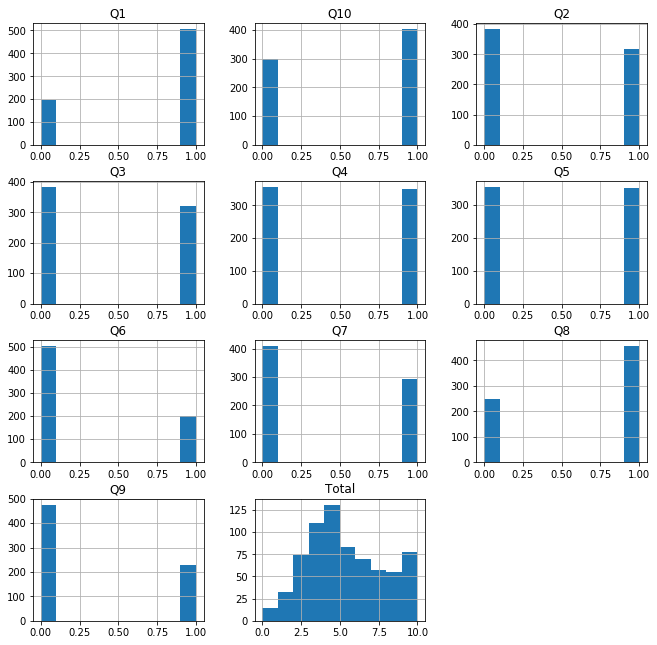

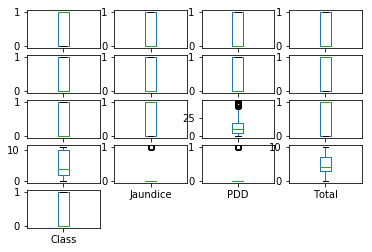

In [130]:
# box and whisker plots
X_train.plot(kind='box', subplots=True, layout=(5,4), sharex=False, sharey=False)
plt.show()

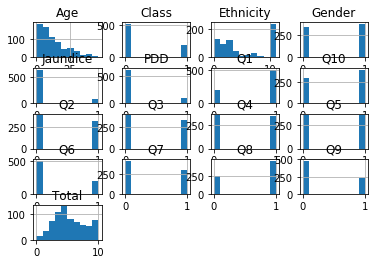

In [131]:
# histograms
X_train.hist()
plt.show()

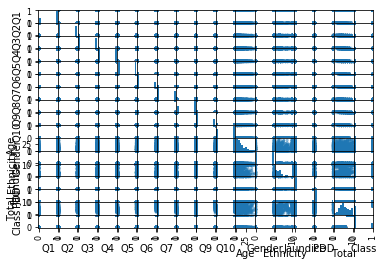

In [132]:
# scatter plot matrix
scatter_matrix(X_train)
plt.show()

In [133]:
# Split-out validation dataset
array = X_train.values
print (array.shape)

(704, 17)


In [134]:
X = array[:,0:15]
Y = array[:,16]
validation_size = 0.20
seed = 7
print (Y.shape)
print (Y)

(704,)
[0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0
 0 1 1 1 0 0 0 1 1 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1
 0 0 0 1 1 1 0 1 1 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 1 0 0 1 0 1 0 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0
 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 1 1 1 0 0 0 1
 1 1 0 1 0 1 0 0 0 0 1 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1
 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 0 0

In [135]:
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [136]:
print (X_train.shape)

(563, 15)


In [137]:
print (Y_train.shape)

(563,)


In [138]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

In [139]:
from sklearn.decomposition import PCA,TruncatedSVD
from sklearn.linear_model import LogisticRegression

pca = PCA(n_components=10, whiten='True')
x_pca = pca.fit(X).transform(X)
print(x_pca)
pca.explained_variance_
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(x_pca, Y, test_size=validation_size, random_state=seed)

lgr=LogisticRegression()
models = []
results=[]
models.append(('LR', LogisticRegression()))
kfold = model_selection.KFold(n_splits=10, random_state=seed)
cv_results = model_selection.cross_val_score(lgr, X_train, Y_train, cv=kfold, scoring='accuracy')
results.append(cv_results)
print(cv_results.mean())

# Make predictions on validation dataset
lgr.fit(X_train, Y_train)
#predictions = lgr.predict(X_validation)
#print(accuracy_score(Y_validation, predictions))
#print(confusion_matrix(Y_validation, predictions))
#print(classification_report(Y_validation, predictions))

print("score")
score=lgr.score(X_validation,Y_validation)
print(score)
print("score train")
score=lgr.score(X_train,Y_train)
print(score)




[[-0.28027022 -1.4096501  -0.40416516 ..., -1.50563055 -1.45161533
   1.63249551]
 [-0.52234015 -0.39939119 -0.29950654 ...,  0.44368011 -1.7925724
  -1.60041924]
 [-0.22903072 -0.32042182  1.17281644 ..., -0.83161005 -0.55211051
  -0.53063386]
 ..., 
 [-0.57002666  0.6620213   1.18005648 ...,  0.22407259 -1.01349795
   1.00879215]
 [ 0.49013146  1.29562705  1.15295921 ..., -0.64673683  0.53757935
  -1.15946692]
 [-0.27981671 -1.42331433  0.88851067 ...,  0.52553494 -0.11785392
   0.71818835]]
1.0
score
1.0
score train
1.0


In [140]:
from sklearn.svm import SVC

svd = TruncatedSVD(n_components = 10)
x = svd.fit(X).transform(X)

vm=SVC()

x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y ,test_size=0.2, random_state=4)
vm.fit(x_train,y_train)

score=vm.score(x_test,y_test)
print(score)
print("score train")
score=vm.score(x_train,y_train)
print(score)


0.900709219858
score train
0.960923623446


In [141]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 1.000000 (0.000000)
LDA: 0.964348 (0.029881)
KNN: 0.936028 (0.026731)
CART: 0.953697 (0.029062)
NB: 0.948434 (0.032380)
SVM: 0.969768 (0.016032)


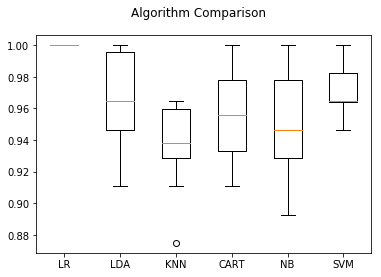

In [142]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [143]:
# Make predictions on validation dataset
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.900709219858
[[92  5]
 [ 9 35]]
             precision    recall  f1-score   support

          0       0.91      0.95      0.93        97
          1       0.88      0.80      0.83        44

avg / total       0.90      0.90      0.90       141



In [144]:
# MLP for Pima Indians Dataset with 10-fold cross validation via sklearn
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import numpy
 
# Function to create model, required for KerasClassifier
def create_model():
	# create model
	model = Sequential()
	model.add(Dense(12, input_dim=8, activation='relu'))
	model.add(Dense(8, activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model
 
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load pima indians dataset
dataset = numpy.loadtxt("/Users/padma/Desktop/Mahit/science-fair-autism/pima-indian-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]
# create model
model = KerasClassifier(build_fn=create_model, epochs=150, batch_size=10, verbose=0)
# evaluate using 10-fold cross validation
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

UnicodeEncodeError: 'latin-1' codec can't encode character '\ufeff' in position 0: ordinal not in range(256)

In [ ]:
# Create your first MLP in Keras
from keras.models import Sequential
from keras.layers import Dense
import numpy
# fix random seed for reproducibility
numpy.random.seed(7)
# load pima indians dataset
dataset = numpy.loadtxt("/Users/padma/Desktop/Mahit/science-fair-autism/pima-indian-diabetes.txt",delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]
# create model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X, Y, epochs=150, batch_size=10)
# evaluate the model
scores = model.evaluate(X, Y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

In [ ]:
# Create your first MLP in Keras
from keras.models import Sequential
from keras.layers import Dense
import numpy
# fix random seed for reproducibility
numpy.random.seed(7)
# load autism dataset
# dataset = numpy.loadtxt("/Users/padma/Desktop/Mahit/science-fair-autism/pima-indian-diabetes.txt",delimiter=",")
# dataset=pd.read_csv('/Users/padma/Desktop/Mahit/science-fair-autism/Autism-Adult-Data-Processed.csv')
dataset=pd.read_csv('/Users/padma/Desktop/Mahit/science-fair-autism/Autism-Adult-Data-Processed.csv')
# split into input (X) and output (Y) variables
array = dataset.values
X = array[:,0:18]
Y = array[:,18]
# create model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X, Y, epochs=150, batch_size=10)
# evaluate the model
scores = model.evaluate(X, Y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))